In [36]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries Imported')

Libraries Imported


In [121]:
i_path = 'D:\\Data\\Box-Office-Forecasting'
m = pd.read_csv(os.path.join(i_path, 'movie-master-final.csv'), header=0, sep=';', engine='python', encoding= 'utf8')

#target_variable = 'revenue_range'; problem_type = 'MULTICLASS'
target_variable = 'is_profitable'; problem_type = 'BINARY'

youtube_features = ['like_ratio', 'like_count', 'dislike_count', 'view_count',
                    'polarity_tb','w_polarity_tb', 'count_pos_tb', 'count_neg_tb', 'polarity_sia',
                    'w_polarity_sia', 'count_pos_sia', 'count_neg_sia', 'polarity_avg',
                    'w_polarity_avg', 'pos_neg_ratio', 'pos_neg_ratio_1', 'pos_neg_ratio_3',
                    'pos_neg_ratio_5']

all_features = ['mpaa', 'budget', 'seasonality', 'is_sequel', 'runtime', 'screen_count',
                'genre', 'year', target_variable] + youtube_features

data = m[all_features]
# data = m[m.comment_count > 1000][all_features]

In [132]:
data.describe()

,mpaa,budget,seasonality,is_sequel,runtime,screen_count,genre,year,is_profitable,like_ratio,like_count,dislike_count,view_count,polarity_tb,w_polarity_tb,count_pos_tb,count_neg_tb,polarity_sia,w_polarity_sia,count_pos_sia,count_neg_sia,polarity_avg,w_polarity_avg,pos_neg_ratio,pos_neg_ratio_1,pos_neg_ratio_3,pos_neg_ratio_5
count,3219.000000,3.219000e+03,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3.219000e+03,3.219000e+03,3.219000e+03,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000
mean,4.143833,3.617218e+07,0.205310,0.118049,105.197888,1803.841876,149.852128,2008.862690,0.554520,18.858451,2.284325e+04,1.719618e+03,4.541170e+06,0.228787,0.226867,659.969866,279.880708,0.217163,0.222395,665.968002,382.154085,0.222975,0.224631,2.439021,2.493250,2.849010,3.051839
std,1.057749,4.565125e+07,0.073624,0.322716,19.830504,1386.705132,83.230698,5.198165,0.497096,13.723854,1.015568e+05,2.032661e+04,9.833595e+06,0.143068,0.174227,2203.753368,831.620118,0.185388,0.233867,2383.329252,1149.722430,0.152809,0.184771,2.208435,2.279561,2.682546,3.764879
min,0.000000,2.000000e+03,0.109700,0.000000,60.000000,1.000000,0.000000,2000.000000,0.000000,0.189704,1.000000e+00,0.000000e+00,4.910000e+02,-0.750000,-0.750000,0.000000,0.000000,-0.907200,-0.907200,0.000000,0.000000,-0.695267,-0.695267,0.066667,0.066667,0.083333,0.090909
25%,4.000000,5.500000e+06,0.155700,0.000000,93.000000,170.000000,92.000000,2005.000000,0.000000,9.871076,5.505000e+02,4.000000e+01,3.022200e+05,0.144543,0.120423,23.000000,7.000000,0.103276,0.071693,22.000000,10.000000,0.126797,0.106088,1.375000,1.384426,1.495669,1.363636
50%,4.000000,2.000000e+07,0.166500,0.000000,102.000000,2094.000000,150.000000,2009.000000,1.000000,15.844444,2.755000e+03,1.620000e+02,1.204373e+06,0.223038,0.223545,105.000000,36.000000,0.218962,0.230104,104.000000,48.000000,0.221433,0.229157,2.000000,2.000000,2.200772,2.196970
75%,5.000000,4.700000e+07,0.234200,0.000000,114.000000,3008.500000,211.000000,2013.000000,1.000000,24.082265,1.313250e+04,8.580000e+02,4.830362e+06,0.310779,0.328639,465.000000,184.000000,0.329689,0.383234,461.000000,246.000000,0.314635,0.346439,2.898276,3.000000,3.352941,3.615385
max,9.000000,3.210000e+08,0.333900,1.000000,700.000000,4535.000000,301.000000,2018.000000,1.000000,157.250000,3.447816e+06,1.115362e+06,2.185057e+08,1.000000,1.000000,67972.000000,11466.000000,0.984500,0.984500,81516.000000,16877.000000,0.841250,0.841250,66.000000,66.000000,65.000000,83.000000


In [122]:
pd.set_option('display.max_columns', 500)
data.head(1)

,mpaa,budget,seasonality,is_sequel,runtime,screen_count,genre,year,is_profitable,like_ratio,like_count,dislike_count,view_count,polarity_tb,w_polarity_tb,count_pos_tb,count_neg_tb,polarity_sia,w_polarity_sia,count_pos_sia,count_neg_sia,polarity_avg,w_polarity_avg,pos_neg_ratio,pos_neg_ratio_1,pos_neg_ratio_3,pos_neg_ratio_5
0,PG-13,75000000.0,0.3339,1,106.0,2708,"Drama, Mystery, Sci-Fi",2000.0,True,23.993228,10628.0,442.0,5081409.0,0.231705,0.273454,502.0,177.0,0.210665,-0.052065,483.0,236.0,0.221185,0.110694,2.042194,2.070796,2.273224,2.372881


In [123]:
# like_ratio column has some 'infinity' values, we replace them with one.
data = data.replace(np.Inf, 1)

# Factorize revenue_range to get numbers instead of labels
factor = pd.factorize(data[target_variable])
data[target_variable] = factor[0]
definitions = factor[1]

# Use LabelEncoder to convert textual classifications to numeric. We will use the same encoder later to convert them back.
encoder = preprocessing.LabelEncoder()
data['mpaa'] = encoder.fit_transform(data['mpaa'].astype(str))
data['genre'] = encoder.fit_transform(data['genre'].astype(str))

# Split columns into independent/predictor variables vs dependent/response/outcome variable
X = np.array(data.drop([target_variable], 1))
y = np.array(data[target_variable])

# Scale the data. We will use the same scaler later for scoring function
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [44]:
# Create the RFE object and compute a cross-validated score.
xgb = XGBClassifier(colsample_bytree=1.0, gamma=1, min_child_weight=1, subsample=0.8) # best params for xgb
rfecv = RFECV(estimator=xgb, step=1, cv=StratifiedKFold(5, random_state=42), scoring='accuracy')
rfecv = rfecv.fit(X, y)

Optimal number of features : 28


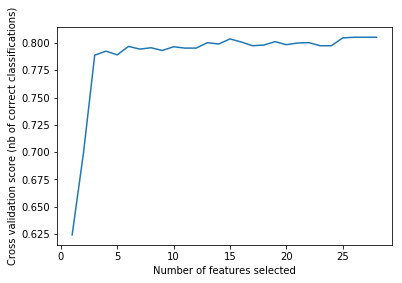

In [45]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [46]:
print(rfecv.grid_scores_)
print(rfecv.ranking_)
print(rfecv.support_)

[0.62409851 0.69897076 0.78876192 0.79248863 0.78907199 0.79683742
 0.79435391 0.79559518 0.79310443 0.79652251 0.79528028 0.79528124
 0.80025357 0.79900892 0.80366923 0.80087517 0.79745515 0.79807531
 0.80118041 0.79838973 0.79994108 0.80025212 0.79745371 0.79745709
 0.80460043 0.80522154 0.80522154 0.80522154]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [47]:
f_count = 0
selected_features = []
candidate_features = list(filter(lambda x: x != target_variable, all_features))
for feature in candidate_features:
    print("Feature: {0}, Rank: {1}, Is Selected: {2}".format(str(feature), str(rfecv.ranking_[f_count]), str(rfecv.support_[f_count]==True)))
    if rfecv.support_[f_count]==True:
        selected_features.append(feature)
    f_count = f_count + 1

print()
print("Selected Features {0}".format(selected_features))
print("Removed Features {0}".format(set(candidate_features) - set(selected_features)))

Feature: mpaa, Rank: 1, Is Selected: True
Feature: budget, Rank: 1, Is Selected: True
Feature: seasonality, Rank: 1, Is Selected: True
Feature: is_sequel, Rank: 1, Is Selected: True
Feature: runtime, Rank: 1, Is Selected: True
Feature: screen_count, Rank: 1, Is Selected: True
Feature: genre, Rank: 1, Is Selected: True
Feature: like_ratio, Rank: 1, Is Selected: True
Feature: like_count, Rank: 1, Is Selected: True
Feature: dislike_count, Rank: 1, Is Selected: True
Feature: polarity_tb, Rank: 1, Is Selected: True
Feature: polarity_sia, Rank: 1, Is Selected: True
Feature: view_count, Rank: 1, Is Selected: True
Feature: year, Rank: 1, Is Selected: True
Feature: polarity_tb, Rank: 1, Is Selected: True
Feature: w_polarity_tb, Rank: 1, Is Selected: True
Feature: count_pos_tb, Rank: 1, Is Selected: True
Feature: count_neg_tb, Rank: 1, Is Selected: True
Feature: polarity_sia, Rank: 1, Is Selected: True
Feature: w_polarity_sia, Rank: 1, Is Selected: True
Feature: count_pos_sia, Rank: 1, Is Select

### One-Out Test

In [106]:
one_out_commented_movies = []
for feature in all_features:
    # Split columns into independent/predictor variables vs dependent/response/outcome variable
    X = np.array(data.drop([target_variable, feature], 1))
    y = np.array(data[target_variable])

    # Scale the data. We will use the same scaler later for scoring function
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)

    xgb = XGBClassifier(colsample_bytree=1.0, gamma=1, min_child_weight=1, subsample=0.8) # best params for xgb
    print("Removed Feature {0}".format(feature))
    cv_score = cross_val_score(xgb, X, y, cv=5) 
    one_out_commented_movies.append(np.mean(cv_score))
    print(cv_score)
    print(np.mean(cv_score))
    print()

Removed Feature mpaa
[0.36619718 0.4245283  0.42105263 0.42307692 0.39320388]
0.40561178462728

Removed Feature budget
[0.36150235 0.40566038 0.40191388 0.40865385 0.40291262]
0.3961286135774973

Removed Feature seasonality
[0.37089202 0.39622642 0.42105263 0.42307692 0.36893204]
0.39603600547290085

Removed Feature is_sequel
[0.3286385  0.41981132 0.43062201 0.39903846 0.39805825]
0.3952337083884646

Removed Feature runtime
[0.37089202 0.40566038 0.40191388 0.40865385 0.40776699]
0.39897742163620553

Removed Feature screen_count
[0.29577465 0.31132075 0.28229665 0.32211538 0.27669903]
0.2976412934127213

Removed Feature genre
[0.34741784 0.40566038 0.37799043 0.42307692 0.39805825]
0.39044076477203893

Removed Feature year
[0.342723   0.41037736 0.41626794 0.41826923 0.40776699]
0.39908090536592533

Removed Feature revenue_range
[0.35211268 0.42924528 0.40669856 0.41826923 0.40291262]
0.4018476751593923

Removed Feature like_ratio
[0.36619718 0.4009434  0.40191388 0.40865385 0.3834951

In [115]:
features_one_out = pd.DataFrame({'feature': all_features,
                                 'removed_cv_score_movies_all': one_out_all_movies,
                                 'removed_cv_score_movies_comment': one_out_commented_movies})

### One-Add Test

In [114]:
one_add_commented_movies = []
base_features = ['budget', 'screen_count']
candidate_features = list(filter(lambda x: x != target_variable, all_features))
for feature in candidate_features:
    # Split columns into independent/predictor variables vs dependent/response/outcome variable
    X = np.array(data[base_features + [feature]])
    y = np.array(data[target_variable])

    # Scale the data. We will use the same scaler later for scoring function
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)

    xgb = XGBClassifier(colsample_bytree=1.0, gamma=1, min_child_weight=1, subsample=0.8) # best params for xgb
    print("Added Feature {0}".format(feature))
    cv_score = cross_val_score(xgb, X, y, cv=5)
    one_add_commented_movies.append(np.mean(cv_score))
    print(cv_score)
    print(np.mean(cv_score))
    print()

Added Feature mpaa
[0.33333333 0.35849057 0.38277512 0.43269231 0.44660194]
0.3907786536856349

Added Feature budget
[0.33802817 0.3490566  0.41626794 0.42307692 0.44174757]
0.39363544225277175

Added Feature seasonality
[0.32394366 0.37735849 0.41148325 0.39423077 0.38349515]
0.37810226419764453

Added Feature is_sequel
[0.35211268 0.39150943 0.38277512 0.41826923 0.4368932 ]
0.3963119328577106

Added Feature runtime
[0.3286385  0.37735849 0.42105263 0.41826923 0.41747573]
0.3925589157444276

Added Feature screen_count
[0.33802817 0.3490566  0.41626794 0.42307692 0.44174757]
0.39363544225277175

Added Feature genre
[0.342723   0.37735849 0.41148325 0.39903846 0.4223301 ]
0.39058666149504606

Added Feature year
[0.342723   0.31603774 0.40669856 0.41826923 0.43203883]
0.3831534741715762

Added Feature like_ratio
[0.35211268 0.37735849 0.38755981 0.4375     0.44174757]
0.39925570961007

Added Feature like_count
[0.36619718 0.37735849 0.42583732 0.38461538 0.41747573]
0.39429682140190325


In [116]:
features_one_add = pd.DataFrame({'feature': candidate_features,
                                 'added_cv_score_movies_all': one_add_all_movies,
                                 'added_cv_score_movies_comment': one_add_commented_movies})

In [117]:
features_multi = pd.merge(features_one_out, features_one_add, on='feature')

In [118]:
features = pd.merge(features_binary, features_multi, on='feature')

In [119]:
file_name = "D:\\Master\\Thesis Related\\Results\\All_OneOut_OneAdd.xlsx"
features.to_excel(file_name, encoding= 'utf8', header=True, index=True)

### Test after feature selection

In [124]:
# i_path = 'D:\\Data\\Box-Office-Forecasting'
# m = pd.read_csv(os.path.join(i_path, 'movie-master-final.csv'), header=0, sep=';', engine='python', encoding= 'utf8')
# data = m[selected_features + [target_variable]]

# # like_ratio column has some 'infinity' values, we replace them with one.
# data = data.replace(np.Inf, 1)

# # Factorize revenue_range to get numbers instead of labels
# factor = pd.factorize(data[target_variable])
# data[target_variable] = factor[0]
# definitions = factor[1]

# # Use LabelEncoder to convert textual classifications to numeric. We will use the same encoder later to convert them back.
# encoder = preprocessing.LabelEncoder()
# if 'mpaa' in selected_features:
#     data['mpaa'] = encoder.fit_transform(data['mpaa'].astype(str))
# if 'genre' in selected_features:
#     data['genre'] = encoder.fit_transform(data['genre'].astype(str))

# Split columns into independent/predictor variables vs dependent/response/outcome variable
X = np.array(data.drop([target_variable], 1))
y = np.array(data[target_variable])

# Scale the data. We will use the same scaler later for scoring function
# scaler = preprocessing.StandardScaler().fit(X)
# X = scaler.transform(X)

# Training - Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=17)

In [125]:
xgb = XGBClassifier(colsample_bytree=1.0, gamma=5, max_depth=6, min_child_weight=1, subsample=1.0)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Confusion Matrix: ")
print(pd.crosstab(y_test, y_pred, rownames=['Actual Labels'], colnames=['Predicted Labels']))
print("")
print("Classification Report: ")
print(metrics.classification_report(y_test, y_pred))
print("")
print(accuracy_score(y_test, y_pred))

Confusion Matrix: 
Predicted Labels    0    1
Actual Labels             
0                 216   71
1                  66  291

Classification Report: 
             precision    recall  f1-score   support

          0       0.77      0.75      0.76       287
          1       0.80      0.82      0.81       357

avg / total       0.79      0.79      0.79       644


0.7872670807453416


[0.03132623 0.07021996 0.0291544  0.06723842 0.0337439  0.12647127
 0.03735814 0.03300498 0.03587845 0.03405386 0.03858685 0.04633673
 0.03341679 0.02865728 0.03092233 0.03405071 0.03091868 0.02985856
 0.0220126  0.02403943 0.03088764 0.02851181 0.03400758 0.03489407
 0.02740819 0.02704114]


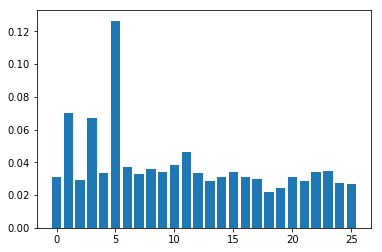

In [126]:
from matplotlib import pyplot
print(xgb.feature_importances_)
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

In [131]:
data.columns
# important ones: budget, is_sequel_ screen_count, dislike_count

Index(['mpaa', 'budget', 'seasonality', 'is_sequel', 'runtime', 'screen_count',
       'genre', 'year', 'is_profitable', 'like_ratio', 'like_count',
       'dislike_count', 'view_count', 'polarity_tb', 'w_polarity_tb',
       'count_pos_tb', 'count_neg_tb', 'polarity_sia', 'w_polarity_sia',
       'count_pos_sia', 'count_neg_sia', 'polarity_avg', 'w_polarity_avg',
       'pos_neg_ratio', 'pos_neg_ratio_1', 'pos_neg_ratio_3',
       'pos_neg_ratio_5'],
      dtype='object')